## PCA(주성분 분석)의 활용 사례 탐구
- 주성분 분석은 sklearn내에서는 SVD 통해서 구현 된다.
- '파일 압축', '이미지 특징 추출'등에도 주성분 분석(SVD)이 활용 가능하다.
- 주성분 분석을 SVD도 구현하는 이유는 임의의 행렬 A가 m행 n열 이라는 점 빼고 제약 조건이 없기 때문

### 01 붓꽃 데이터(iris)로 주성분 분석, SVD관계 확인
- PCA(주성분 분석)이 사실상 SVD(Singular Value Decomposition)임을 확인한다.
- $A = UΣV^T$ 에서 $V^T$가 사실상 우리가 아는 PC(Principal Component Analysis)임을 확인한다.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
iris = load_iris()
X_original = iris.data # 원본 데이터

# 중요: PCA는 내부적으로 데이터의 평균을 0으로 만듭니다.
# SVD와 직접 비교하려면, 우리도 동일하게 데이터의 평균을 0으로 맞춰야 합니다.
# StandardScaler를 사용하되, 분산 스케일링은 하지 않고 평균만 제거합니다 (with_std=False).
scaler = StandardScaler(with_std=False) # 평균만 0으로 만드는 Scaler
X_centered = scaler.fit_transform(X_original) # 평균이 제거된 데이터

# 주성분 개수를 2개로 설정 (결과를 간단히 보기 위함)
N_COMPONENTS = 2

In [ ]:
X_original[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
# --- 2. Scikit-learn을 사용한 PCA 수행 ---
print("--- 1. Scikit-learn PCA 결과 ---")
# PCA 객체 생성. n_components는 우리가 보고자 하는 주성분의 수입니다.
# svd_solver='full'은 SVD를 확실히 사용하도록 합니다.
pca_sklearn = PCA(n_components=N_COMPONENTS, svd_solver='full')

# PCA 모델 학습. pca_sklearn.fit()에는 원본 데이터를 전달합니다.
# PCA 객체 내부에서 평균 중심화를 자동으로 수행합니다.
pca_sklearn.fit(X_original)

# PCA 결과
# components_ : 주성분 방향 벡터들 (SVD의 V^T 행들과 유사)
pca_components = pca_sklearn.components_
# singular_values_ : 특이값들 (SVD의 s와 유사)
pca_singular_values = pca_sklearn.singular_values_
# transform() : 데이터를 주성분 공간으로 변환 (SVD의 U * Sigma 와 유사)
X_transformed_pca = pca_sklearn.transform(X_original)

print(f"PCA 주성분 방향 (pca.components_):\n{pca_components}\n")
print(f"PCA 특이값 (pca.singular_values_):\n{pca_singular_values}\n")
print(f"PCA로 변환된 데이터 (처음 3개 샘플):\n{X_transformed_pca[:3]}\n")

--- 1. Scikit-learn PCA 결과 ---
PCA 주성분 방향 (pca.components_):
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

PCA 특이값 (pca.singular_values_):
[25.09996044  6.01314738]

PCA로 변환된 데이터 (처음 3개 샘플):
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]]



In [ ]:
# --- 3. NumPy를 사용한 SVD 직접 수행 ---
print("\n--- 2. NumPy SVD 결과 (평균 제거된 데이터 사용) ---")
# 위에서 준비한 X_centered (평균이 제거된 데이터)에 SVD를 적용합니다.
# full_matrices=False는 경제적인 크기의 U와 Vt를 반환합니다.
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

# SVD 결과
# Vt : V 행렬의 전치. Vt의 행들이 주성분 방향 벡터들에 해당.
svd_Vt = Vt[:N_COMPONENTS, :] # PCA와 동일하게 n_components 개수만큼 선택
# s : 특이값들의 배열.
svd_s = s[:N_COMPONENTS]      # PCA와 동일하게 n_components 개수만큼 선택
# U * Sigma : 변환된 데이터. U와 s를 이용해 계산.
# U의 열과 s를 사용해 주성분 점수를 만듭니다.
X_transformed_svd = U[:, :N_COMPONENTS] @ np.diag(svd_s)


print(f"SVD의 V^T 행렬의 첫 {N_COMPONENTS}개 행 (주성분 방향):\n{svd_Vt}\n")
print(f"SVD의 특이값 s (첫 {N_COMPONENTS}개):\n{svd_s}\n")
print(f"SVD로 변환된 데이터 (U*Sigma) (처음 3개 샘플):\n{X_transformed_svd[:3]}\n")


--- 2. NumPy SVD 결과 (평균 제거된 데이터 사용) ---
SVD의 V^T 행렬의 첫 2개 행 (주성분 방향):
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]

SVD의 특이값 s (첫 2개):
[25.09996044  6.01314738]

SVD로 변환된 데이터 (U*Sigma) (처음 3개 샘플):
[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]]



### 02 이미지 축소에 적용해보기
- 흑백, 컬러 이미지 등을 축소할 때도 PCA가 유용하게 활용된다.
- 단 JPEG, PNG 등의 실제 이미지 파일 압축 알고리즘과는 매커니즘이 다름

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # PCA를 import!
from PIL import Image # PIL에 주목! (해상도 고정 등에 쓰이는 라이브러리)
from google.colab import files
# from tkinter import filedialog # (local에서 하고 싶다면 이렇게)
# from tkinter import Tk # (local에서 하고 싶다면 이렇게)

#### 02-01) 관련 함수 정의
- 이미지 업로드(로컬 파일)
- 이미지 해상도 고정
  - 흔히 딥러닝(CNN)에서 이미지 처리할 때 흔히 256*256이나 224*224 크기의 이미지를 많이 활용함


In [ ]:
# # 로컬 파일 업로드(로컬에서 업로드 할 때)
# def upload_image():
#     root = Tk()
#     root.withdraw()  # 창을 숨김
#     img_path = filedialog.askopenfilename(title="이미지 파일을 선택하세요.", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
#     root.destroy()  # 다이얼로그 닫기
#     return img_path

In [2]:
# 이미지 불러오기 및 256x256 크기 조정
def load_and_resize_image(img_path):
    img = Image.open(img_path)
    img_resized = img.resize((256, 256))  # 256x256로 크기 변경
    img_array = np.array(img_resized)
    return img_array

In [3]:
# PCA 적용 및 이미지 비교
def apply_pca_per_channel(img_array, n_components=50):
    reconstructed_channels = []
    for c in range(3):  # R, G, B 각각 처리
        channel = img_array[:, :, c]
        # 2D -> 2D 유지
        pca = PCA(n_components=min(n_components, channel.shape[1]))
        channel_pca = pca.fit_transform(channel)
        channel_reconstructed = pca.inverse_transform(channel_pca) # 축소된 차원 수 기반, 256*256으로 복원!(압축!)
        reconstructed_channels.append(channel_reconstructed)

    # 채널 다시 쌓기
    img_reconstructed = np.stack(reconstructed_channels, axis=2)
    return img_reconstructed

#### 02-02) 실제 적용
- 로컬에서 이미지 업로드 후 처리해보자
- 256*256 이미지를, PC를 30, 50, 100 으로 변동시키며 확인해보자

In [4]:
# 로컬 파일 업로드 후 처리
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

Saving 오마이걸아린_6.png to 오마이걸아린_6.png


In [5]:
img = Image.open(img_path)
print("원본 이미지 크기:", img.size)

원본 이미지 크기: (1280, 853)


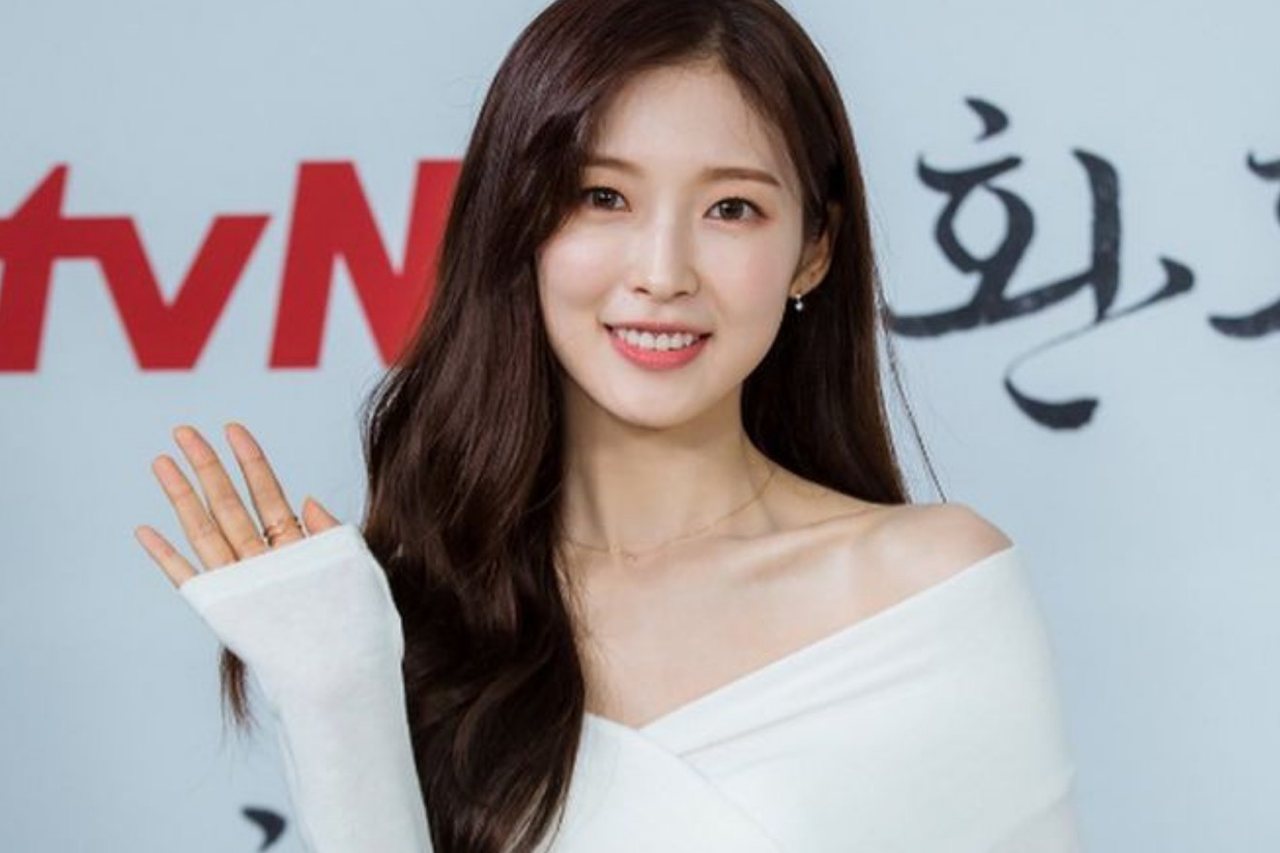

In [11]:
img

In [8]:
img_array = load_and_resize_image(img_path)

In [9]:
img_array[:3]

array([[[180, 198, 210, 255],
        [180, 198, 210, 255],
        [179, 197, 209, 255],
        ...,
        [194, 211, 221, 255],
        [194, 211, 221, 255],
        [193, 210, 220, 255]],

       [[180, 198, 210, 255],
        [180, 198, 210, 255],
        [179, 197, 209, 255],
        ...,
        [194, 211, 221, 255],
        [194, 211, 221, 255],
        [193, 210, 220, 255]],

       [[180, 198, 210, 255],
        [180, 198, 210, 255],
        [180, 198, 210, 255],
        ...,
        [194, 211, 221, 255],
        [194, 211, 221, 255],
        [193, 210, 220, 255]]], dtype=uint8)

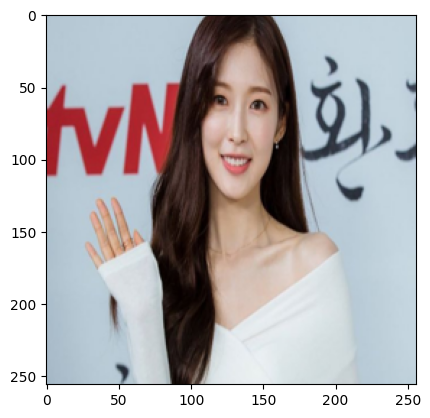

In [10]:
plt.imshow(img_array) # img_array 원본 확인!

In [12]:
# PCA 적용 및 이미지 복원
reconstructed_img = apply_pca_per_channel(img_array, n_components=10) # PC=10

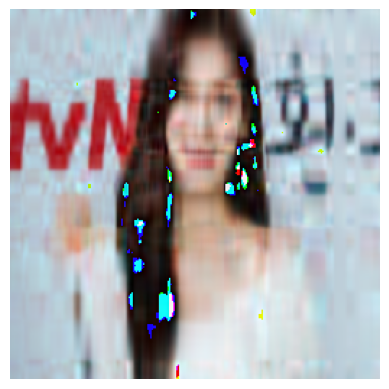

In [13]:
# from PIL import Image # 이미 import 함!
# 반드시 0~255 정수형 변환 필요
# reconstructed_img # 이것만 실행시키면 3차원 array 수치형 데이터만 나옴

reconstructed_array = apply_pca_per_channel(img_array, n_components=10)
plt.imshow(reconstructed_array.astype(np.uint8))
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(1279.5), np.float64(852.5), np.float64(-0.5))

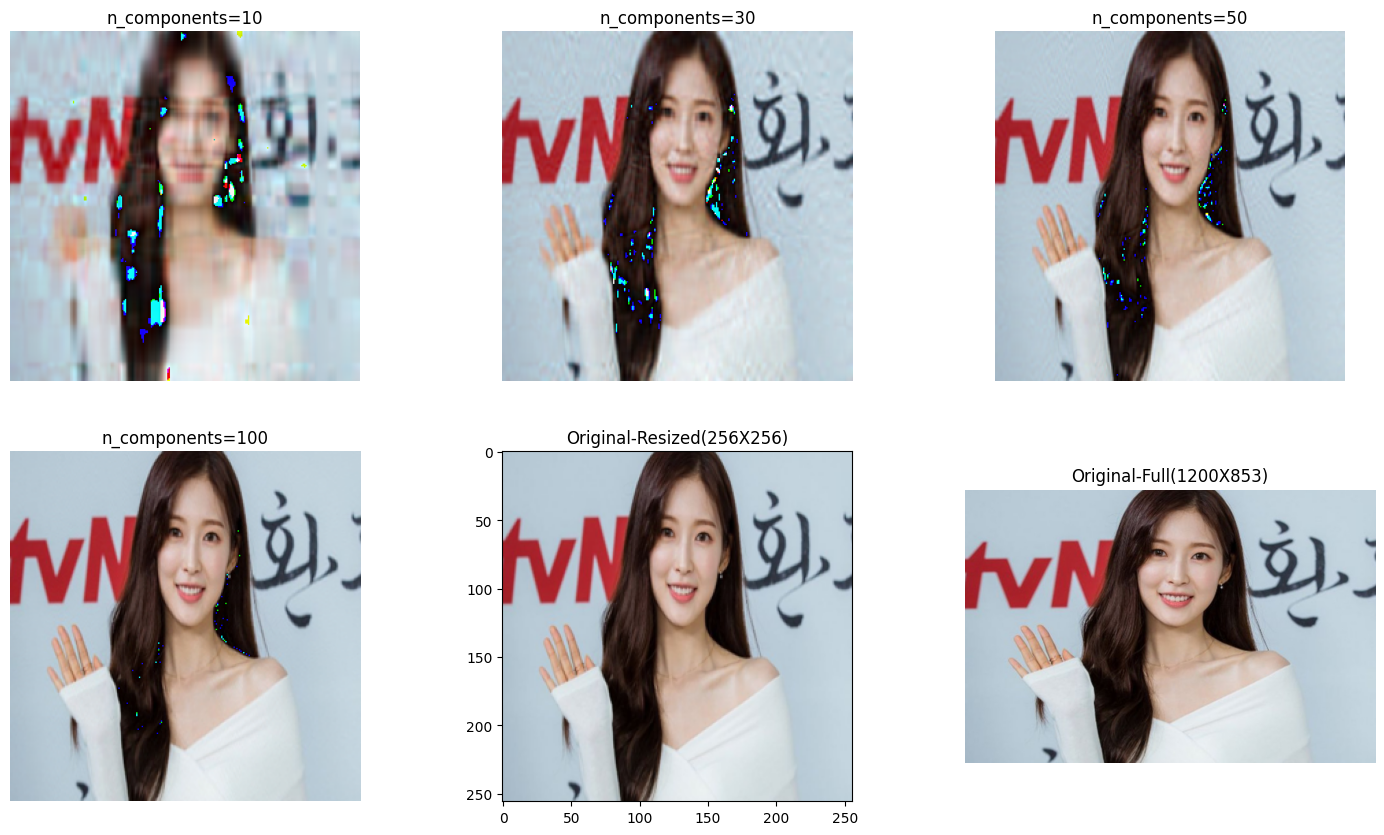

In [18]:
n_components_list = [10, 30, 50, 100]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# n_components별 압축본 출력
for idx, n in enumerate(n_components_list):
    row = idx // 3  # 행
    col = idx % 3   # 열
    reconstructed_array = apply_pca_per_channel(img_array, n_components=n)
    axes[row, col].imshow(reconstructed_array.astype(np.uint8))
    axes[row, col].set_title(f'n_components={n}')
    axes[row, col].axis('off')

# 다섯번째 칸에 256x256 리사이즈본 출력
axes[1,1].imshow(img_array.astype(np.uint8))
axes[1,1].set_title('Original-Resized(256X256)')

# 마지막 칸에 원래해상도(1280, 853) 이미지 출력
axes[1, 2].imshow(img)
axes[1, 2].set_title('Original-Full(1200X853)')
axes[1, 2].axis('off')